In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
## import dataframes
kk_df = pd.read_csv("KKResult.txt")

rr0_df = pd.read_csv("RR0Result.txt")
hc0_df = pd.read_csv("HC0Result.txt")
sa0_df = pd.read_csv("SA0Result.txt")

rr1_df = pd.read_csv("RR1Result.txt")
hc1_df = pd.read_csv("HC1Result.txt")
sa1_df = pd.read_csv("SA1Result.txt")

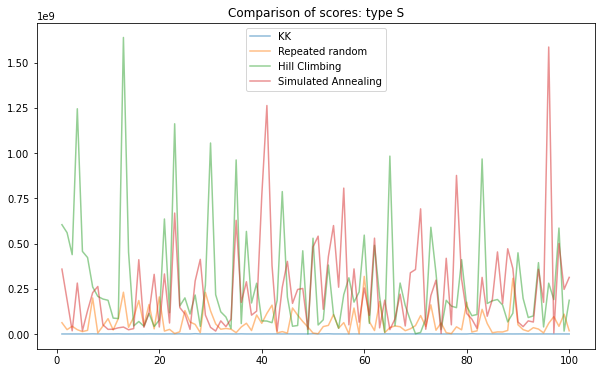

In [3]:
trials = np.arange(1, 101)
plt.figure(figsize=(10,6))

plt.plot(trials, kk_df["score"], label = "KK", alpha = 0.5)
plt.plot(trials, rr0_df["score"], label = "Repeated random", alpha = 0.5)
plt.plot(trials, hc0_df["score"], label = "Hill Climbing", alpha = 0.5)
plt.plot(trials, sa0_df["score"], label = "Simulated Annealing", alpha = 0.5)
plt.title("Comparison of scores: type S")
plt.legend()

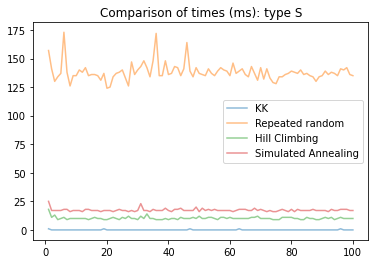

In [4]:
plt.plot(trials, kk_df["time"], label = "KK", alpha = 0.5)
plt.plot(trials, rr0_df["time"], label = "Repeated random", alpha = 0.5)
plt.plot(trials, hc0_df["time"], label = "Hill Climbing", alpha = 0.5)
plt.plot(trials, sa0_df["time"], label = "Simulated Annealing", alpha = 0.5)
plt.title("Comparison of times (ms): type S")
plt.legend()

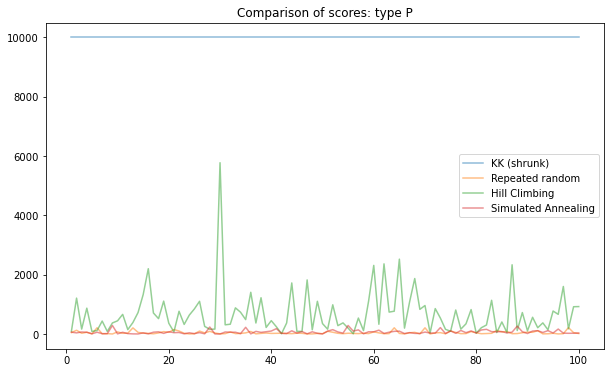

In [5]:
plt.figure(figsize=(10,6))

plt.plot(trials, [10000]*100, label = "KK (shrunk)", alpha = 0.5)
plt.plot(trials, rr1_df["score"], label = "Repeated random", alpha = 0.5)
plt.plot(trials, hc1_df["score"], label = "Hill Climbing", alpha = 0.5)
plt.plot(trials, sa1_df["score"], label = "Simulated Annealing", alpha = 0.5)
plt.title("Comparison of scores: type P")
plt.legend(loc = "best")

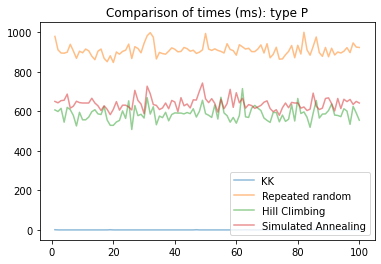

In [6]:
plt.plot(trials, kk_df["time"], label = "KK", alpha = 0.5)
plt.plot(trials, rr1_df["time"], label = "Repeated random", alpha = 0.5)
plt.plot(trials, hc1_df["time"], label = "Hill Climbing", alpha = 0.5)
plt.plot(trials, sa1_df["time"], label = "Simulated Annealing", alpha = 0.5)
plt.title("Comparison of times (ms): type P")
plt.legend(loc = "lower right")

In [7]:
print(kk_df["score"].mean())

print(rr0_df["score"].mean())
print(hc0_df["score"].mean())
print(sa0_df["score"].mean())

print(rr1_df["score"].mean())
print(hc1_df["score"].mean())
print(sa1_df["score"].mean())

240044.79
63045780.07
272753565.29
246327814.51
43.55
678.19
65.97


In [8]:
print(kk_df["time"].mean())

print(rr0_df["time"].mean())
print(hc0_df["time"].mean())
print(sa0_df["time"].mean())

print(rr1_df["time"].mean())
print(hc1_df["time"].mean())
print(sa1_df["time"].mean())

0.05
138.14
10.24
17.31
909.0
586.66
638.8


In [4]:
def num_partition_dp(A):
    b = sum(A)
    n = len(A)
    # this will help us find signs for later
    # first value of tuple is the intermediate sum
    # second value of tuple is the index of the element added
    ptrs = [[(0, 0) for i in range(b+1)] for j in range(n+1)]
    
    # dp is automatically false everywhere
    # only zero sum possible for zero elements
    # so first row all false except at col 0
    dp = [[False for i in range(b+1)] for j in range(n+1)]
    
    # sum of zero always possible for each i
    for i in range(n+1):
        dp[i][0] = True
    
    for i in range(1, n+1):
        for j in range(1, b+1):
            if (not dp[i-1][j]) and (not dp[i-1][j-A[i-1]]):
            # case bash to see this is true
            dp[i][j] = dp[i-1][j]
            
            # if we choose to add, only if at most
            # and only if this gives valid
            if A[i-1] <= j and dp[i-1][j-A[i-1]]:
                dp[i][j] = True
                ptrs[j] = (j-A[i-1], i-1)
                
    # now, dp[i][j] should return True iff possible to sum some of first i to get j
    # so now we bash and find best |b-2a|.
    # first, initialize best so far to the sum of all
    # works because of triangle inequality
    best = b
    for j in range(b//2, -1, -1):
        # if possible
        if dp[n][j]:
            best = b - 2*j
            break
    
    # now find sequences
    res = [1]*n
    temp = j
    
    while temp > 0:
        res[ptrs[temp][1]] = -1
        temp = ptrs[temp][0]
    
    return res

In [5]:
num_partition_dp([10, 8, 7, 6, 5])

[1, -1, 1, 1, -1]

In [6]:
# A Recursive Python3 program to solve
# minimum sum partition problem.
import sys
 
# Returns the minimum value of the
# difference of the two sets.
def findMin(a, n):
     
    su = 0
     
    # Calculate sum of all elements
    su = sum(a)
 
    # Create an 2d list to store
    # results of subproblems
    dp = [[0 for i in range(su + 1)]
             for j in range(n + 1)]
 
    # Initialize first column as true.
    # 0 sum is possible
    # with all elements.
    for i in range(n + 1):
        dp[i][0] = True
         
    # Initialize top row, except dp[0][0],
    # as false. With 0 elements, no other
    # sum except 0 is possible
    for j in range(1, su + 1):
        dp[0][j] = False
     
    # Fill the partition table in
    # bottom up manner
    for i in range(1, n + 1):
        for j in range(1, su + 1):
             
            # If i'th element is excluded
            dp[i][j] = dp[i - 1][j]
             
            # If i'th element is included
            if a[i - 1] <= j:
                dp[i][j] |= dp[i - 1][j - a[i - 1]]
     
    # Initialize difference
    # of two sums.
    diff = sys.maxsize
 
    # Find the largest j such that dp[n][j]
    # is true where j loops from sum/2 t0 0
    for j in range(su // 2, -1, -1):
        if dp[n][j] == True:
            diff = su - (2 * j)
            break
             
    return diff

In [8]:
a = [10, 8, 7, 6, 5]
n = len(a)
findMin(a, n)

0